In [741]:
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import pandas as pd  # type: ignore
import math as m
import random

In [742]:
NUM_ITERATIONS = 10
NUM_WOLFS = 10

In [743]:
NUM_INTERVALS = 96

In [744]:
# Matriz de carros: 1-Modelo | 2-Capacidade (kM) | 3-ID | 4-disponibilidade | 5-viagem | 6-Capacidade | 7-Capacidade da bateria (kWh) | 8-Taxa de carga da bateria (kW) | 9-Taxa de descarga da bateria (kW)
cars_array = np.array(
    [
        [1, 170, 1, 0, 0, 4, 44.9, 0.2 * 44.9, -50 / 4, (60 / 170) * 44.9 * 0.25],
        [2, 230, 2, 0, 0, 5, 229, 0.2 * 229, -100 / 4, (60 / 230) * 229 * 0.25],
        [3, 230, 3, 0, 0, 3, 174, 0.2 * 174, -100 / 4, (60 / 230) * 174 * 0.25],
    ]
)
df = pd.DataFrame(
    cars_array,
    columns=[
        "Modelo",
        "Capacidade (km)",
        "ID",
        "Disponibilidade",
        "Viagem",
        "Capacidade",
        "Capacidade da bateria (kWh)",
        "Taxa de carga da bateria (kW)",
        "Taxa de descarga da bateria (kW)",
        "Taxa de carga específica (kW)",
    ],
)

df.head()

,Modelo,Capacidade (km),ID,Disponibilidade,Viagem,Capacidade,Capacidade da bateria (kWh),Taxa de carga da bateria (kW),Taxa de descarga da bateria (kW),Taxa de carga específica (kW)
0,1.0,170.0,1.0,0.0,0.0,4.0,44.9,8.98,-12.5,3.961765
1,2.0,230.0,2.0,0.0,0.0,5.0,229.0,45.80,-25.0,14.934783
2,3.0,230.0,3.0,0.0,0.0,3.0,174.0,34.80,-25.0,11.347826


In [745]:
cars = [
    {
        "autonomy_km": car[1],
        "autonomy_kwh": car[6],
        "tx_charge": car[7],
        "tx_discharge": np.abs(car[8]),
    }
    for car in cars_array
]

In [746]:
for car in cars:
    print(car)

{'autonomy_km': np.float64(170.0), 'autonomy_kwh': np.float64(44.9), 'tx_charge': np.float64(8.98), 'tx_discharge': np.float64(12.5)}
{'autonomy_km': np.float64(230.0), 'autonomy_kwh': np.float64(229.0), 'tx_charge': np.float64(45.800000000000004), 'tx_discharge': np.float64(25.0)}
{'autonomy_km': np.float64(230.0), 'autonomy_kwh': np.float64(174.0), 'tx_charge': np.float64(34.800000000000004), 'tx_discharge': np.float64(25.0)}


In [747]:
travels = [
    [(15, 20), (48, 55), (90, 92)],
    [(17, 24), (90, 92)],
    [(50, 55), (76, 89)],
]

In [748]:
def find_available_intervals(occupied_positions):
    available_intervals = []
    current_start = 0

    for start, end in sorted(occupied_positions):
        if current_start < start:
            available_intervals.append((current_start, start - 1))
        current_start = end + 1

    if current_start < NUM_INTERVALS:
        available_intervals.append((current_start, NUM_INTERVALS - 1))

    return available_intervals

In [749]:
available_intervals = [find_available_intervals(travel) for travel in travels]
available_intervals

[[(0, 14), (21, 47), (56, 89), (93, 95)],
 [(0, 16), (25, 89), (93, 95)],
 [(0, 49), (56, 75), (90, 95)]]

In [750]:
def calculate_travel_charge_time(travel, tx_charge, tx_discharge):
    start, end = travel
    spent_energy = (end - start) * tx_discharge
    charge_time = m.ceil(spent_energy / tx_charge)

    return charge_time

In [751]:
charge_times = [
    [
        calculate_travel_charge_time(travel, car["tx_charge"], car["tx_discharge"])
        for travel in car_travels
    ]
    + [0] * (len(available_interval) - len(car_travels))
    for car, car_travels, available_interval in zip(
        cars.copy(), travels.copy(), available_intervals.copy()
    )
]
charge_times

[[7, 10, 3, 0], [4, 2, 0], [4, 10, 0]]

In [752]:
def generate_min_charging_random_vector(total_size, min_charging):
    vector = [-1] * min_charging

    rand_vector = np.random.choice((-1, 1), size=(total_size - min_charging)).astype(
        int
    )
    vector.extend(rand_vector.tolist())
    
    np.random.shuffle(vector)

    return vector

In [753]:
cars_state = [
    element
    for car_available_lists in [
        (
            generate_min_charging_random_vector(end - start + 1, min_charge)
            for (start, end), min_charge in zip(car_available_intervals, charge_time)
        )
        for charge_time, car_available_intervals in zip(
            charge_times, available_intervals
        )
    ]
    for available_list in car_available_lists
    for element in available_list
]
print(*cars_state)
print(len(cars_state))

-1 -1 -1 -1 1 -1 -1 1 1 1 1 1 -1 -1 -1 1 1 1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 1 -1 1 1 1 -1 1 -1 -1 1 -1 1 1 1 1 -1 1 -1 -1 1 -1 -1 -1 -1 1 1 1 1 1 -1 1 1 1 -1 1 -1 1 1 -1 -1 1 1 -1 -1 1 -1 1 -1 1 -1 1 -1 -1 -1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 1 -1 -1 -1 1 1 1 -1 -1 -1 1 1 1 1 -1 1 1 1 -1 -1 -1 -1 1 1 1 -1 1 -1 1 1 1 -1 1 1 -1 1 1 -1 -1 1 1 -1 -1 1 -1 1 -1 1 -1 1 1 1 -1 1 -1 1 1 1 1 1 1 -1 1 1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 1 1 -1 -1 -1 1 1 -1 1 1 -1 1 -1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 1 1 -1 1 -1 1 -1 -1 -1 -1 -1 -1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 1 1 -1 -1 -1 -1 1 -1 -1 -1 -1
240


In [754]:
for i, car_travels in enumerate(travels):
    for travel in car_travels:
        start, end = travel
        position = start + 96 * i
        cars_state[position:position] = [0] * (end - start + 1)

print(*cars_state)
print(len(cars_state))

-1 -1 -1 -1 1 -1 -1 1 1 1 1 1 -1 -1 -1 0 0 0 0 0 0 1 1 1 -1 -1 -1 -1 1 -1 -1 -1 -1 -1 -1 1 -1 1 1 1 -1 1 -1 -1 1 -1 1 1 0 0 0 0 0 0 0 0 1 1 -1 1 -1 -1 1 -1 -1 -1 -1 1 1 1 1 1 -1 1 1 1 -1 1 -1 1 1 -1 -1 1 1 -1 -1 1 -1 1 0 0 0 -1 1 -1 1 -1 -1 -1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 0 0 0 0 0 0 0 0 -1 1 -1 -1 -1 -1 1 -1 -1 -1 1 1 1 -1 -1 -1 1 1 1 1 -1 1 1 1 -1 -1 -1 -1 1 1 1 -1 1 -1 1 1 1 -1 1 1 -1 1 1 -1 -1 1 1 -1 -1 1 -1 1 -1 1 -1 1 1 1 -1 1 -1 1 1 1 1 0 0 0 1 1 -1 1 1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 1 1 -1 -1 -1 1 1 -1 1 1 -1 1 -1 -1 -1 -1 1 -1 -1 1 -1 -1 -1 -1 -1 1 -1 1 1 -1 1 -1 1 -1 -1 0 0 0 0 0 0 -1 -1 -1 -1 -1 1 1 -1 -1 1 -1 -1 -1 -1 -1 1 1 -1 -1 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -1 1 -1 -1 -1 -1
288


In [755]:
def split_list(lst, chunk_size=NUM_INTERVALS):
    return [lst[i : i + chunk_size] for i in range(0, len(lst), chunk_size)]

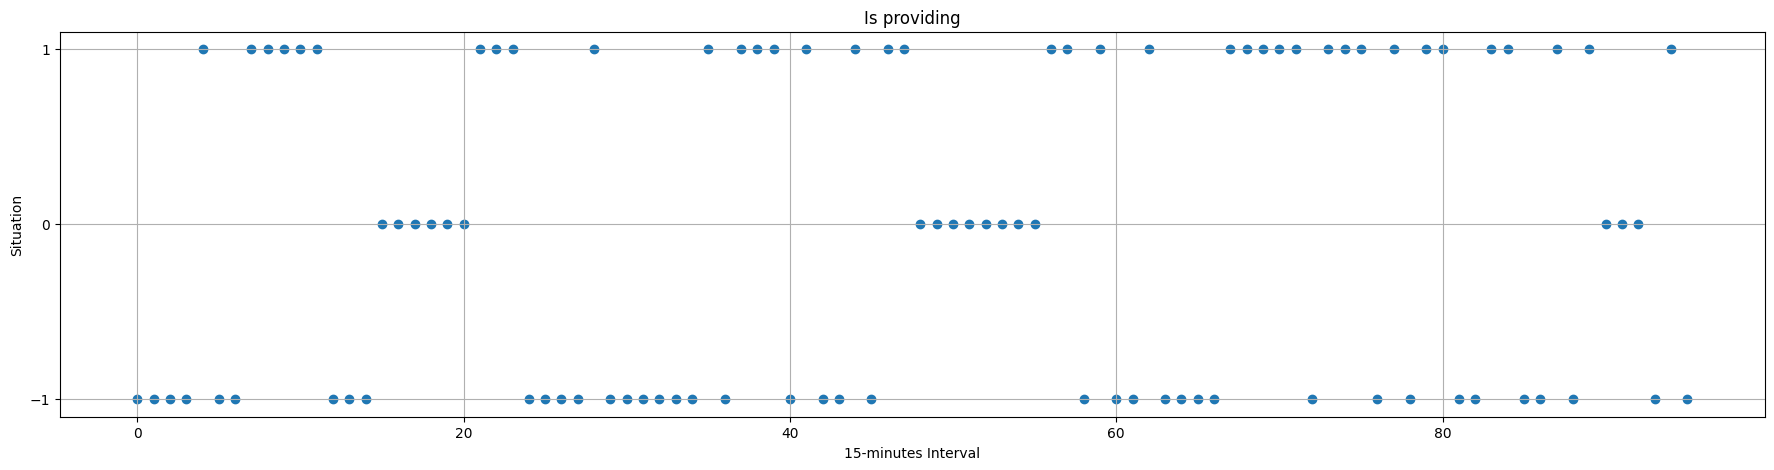

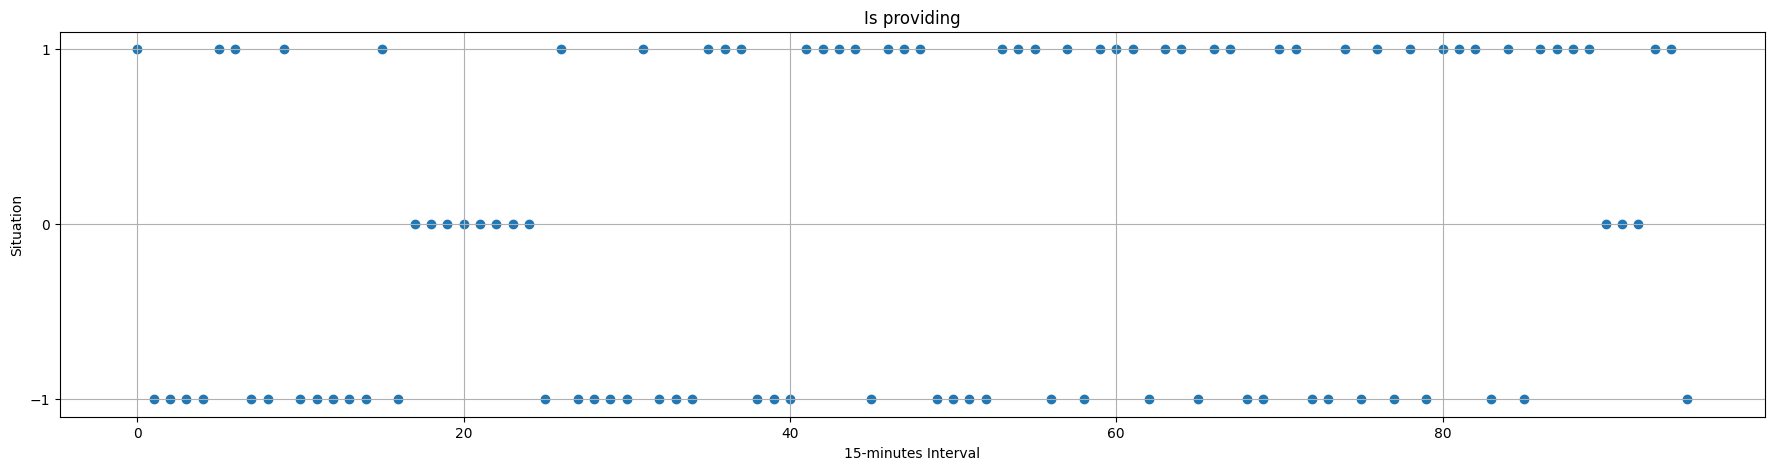

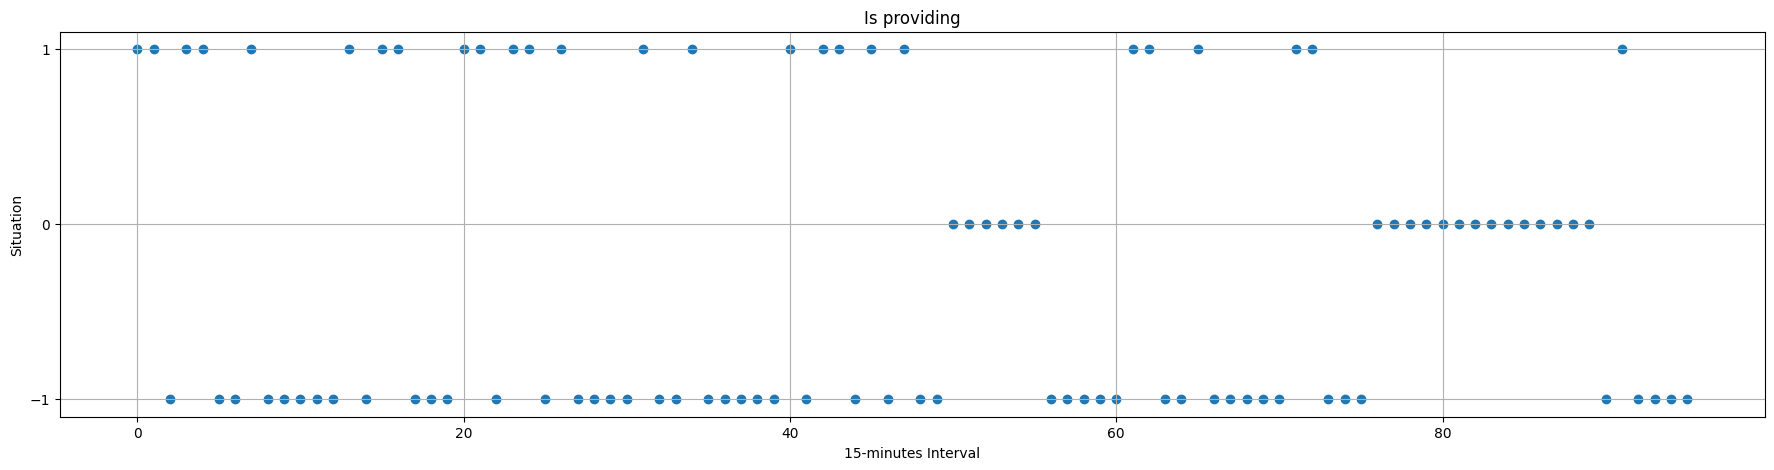

In [756]:
for item in split_list(cars_state):
    plt.figure(figsize=(22, 5))
    plt.scatter(range(len(item)), item, marker='o')
    plt.title('Is providing')
    plt.xlabel('15-minutes Interval')
    plt.ylabel('Situation')
    plt.grid(True)
    plt.yticks([-1, 0, 1])
    plt.ylim(-1.1, 1.1)
    plt.show()